<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/02_1_Exploratory_final_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Total_staff_by_employee.csv .

import pandas as pd
staff = pd.read_csv('Total_staff_by_employee.csv', sep=';')

# Exploratory analysis of the generated Staff Data

In this notebook we are going to analyze the data we have generated for our analysis from the real data we had. (Notebook 00)

This dataset represents a company staff, with a row by employee. 
We have a final column which stays if the employee has had an accident.

Columns in our dataframe:

- Codigo accidentado == Accident code
- Turno == Turn
- Gender
- Planta == Plant
- Tipo accidente == Accident type
- Tipo trabajador == Worker type
- Fabrica == Fabric
- Tecnología == Tecnology
- Pais == Country
- Horas Presencia Efectiva Subcontratados == Efective hours Subcontracted
- Horas Presencia Efectiva ETTs == Efective hours ETTs
- Horas Formacion Seguridad Propios == Trainning hours company employees
- Horas Formacion Seguridad ETTs == Trainning hours ETTs
- Accident 
- wk_position == work position
- Age
- Severity
- Accident_place

#### Attention: This notebook contains Altair charts that are not displayed in GitHub

In [168]:
staff.drop(columns={'Unnamed: 0'}, inplace=True)
staff.head(15)

,Codigo accidentado,Turno,Gender,Planta,Tipo accidente,Tipo trabajador,Fabrica,Tecnología,Pais,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place
0,HS-CHGQ_6253,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Programador,Entre 30-50,Leve,Mantenimiento
1,HS-CHGQ_6813,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista y limpieza de caldera,Mayor 50,Muy grave,Mantenimiento
2,HS-CHGQ_6814,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista ácido,Entre 30-50,Muy grave,Mantenimiento
3,HS-CHGQ_6138,Turno de mañana,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Montacarguista (en entrenamiento),Entre 30-50,Grave,Mantenimiento
4,HS-CHGQ_6139,Turno de tarde,Hombre,45,Incidente,Incidente (no aplica),Asturias,Decapado,España,0.0,0.0,0.0,0.0,Yes,Gruista y limpieza de caldera,Entre 30-50,Grave,Mantenimiento
5,HS-LBRN_6191,Turno de noche,Hombre,30,Incidente,Incidente (no aplica),Galicia,Corte Transversal,España,17051.0,211.0,757.0,0.0,Yes,Líneas de Corte Longitudinal,Mayor 50,Muy grave,Mantenimiento
6,HS-HIAS_6250,Turno de tarde,Hombre,15,Incidente,ETT,Burgos,Corte Longitudinal,España,25249.0,42485.0,1419.0,829.0,Yes,Operadores limpieza de caldera y gruista de ca...,Entre 30-50,Grave,Mantenimiento
7,HS-HIAS_6625,Turno de mañana,Hombre,15,Incidente,ETT,Burgos,Corte Longitudinal,España,25249.0,42485.0,1419.0,829.0,Yes,Maestro,Mayor 50,Muy grave,Mantenimiento
8,HS-HIAS_6815,Turno de tarde,Hombre,15,Incidente,ETT,Burgos,Corte Longitudinal,España,25249.0,42485.0,1419.0,829.0,Yes,Líneas de Corte Longitudinal,Mayor 50,Muy grave,Mantenimiento
9,HS-TRRG_6316,Turno de noche,Hombre,4,Incidente,Incidente (no aplica),Arizona,Células Soldadura,EEUU,0.0,0.0,0.0,0.0,Yes,Maschinenbediener/-einrichter Presse 5,Entre 30-50,Leve,Mantenimiento


In [169]:
len(staff)

21210

In [170]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21210 entries, 0 to 21209
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Codigo accidentado                       4180 non-null   object 
 1   Turno                                    21210 non-null  object 
 2   Gender                                   21210 non-null  object 
 3   Planta                                   21210 non-null  int64  
 4   Tipo accidente                           4180 non-null   object 
 5   Tipo trabajador                          21210 non-null  object 
 6   Fabrica                                  21210 non-null  object 
 7   Tecnología                               21210 non-null  object 
 8   Pais                                     21210 non-null  object 
 9   Horas Presencia Efectiva Subcontratados  15849 non-null  float64
 10  Horas Presencia Efectiva ETTs            15849

In [171]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [172]:
staff.shape ## 18 columns and 21.210 employees

(21210, 18)

A 19.7% of our employees has had an accident during its time in time company

In [173]:
number_accidents = len(staff[staff['Accident']=='Yes'])
employees = len(staff)

number_accidents / employees * 100

19.70768505421971

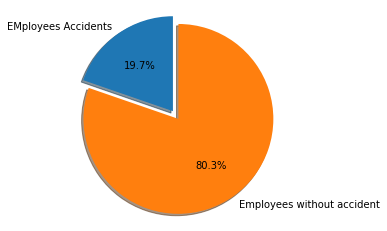

In [174]:
labels = 'EMployees Accidents', 'Employees without accident'
sizes = [len(staff[staff['Accident']=='Yes']), len(staff[staff['Accident']=='No'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [175]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place'],
      dtype='object')

In [176]:
staff['N employees'] = 1

In [177]:
staff['Severity'] = staff['Severity'].fillna('N/A')

In [178]:
staff['Tipo accidente'] = staff['Tipo accidente'].fillna('N/A')

In [179]:
# we are going to aggregate the data in order to be able to plot it in a clear way

n_employees = staff.groupby(by=['Fabrica',
       'Accident', 'Severity']).agg('sum')


In [180]:
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)

In [181]:
n_employees = n_employees.reset_index()
n_employees.head()

,Fabrica,Accident,Severity,N employees
0,Argentina,No,N/A,865
1,Argentina,Yes,Grave,317
2,Argentina,Yes,Leve,311
3,Argentina,Yes,Muy grave,287
4,Arizona,No,N/A,1386


In [182]:
import altair as alt


In [183]:
!pip install altair_viewer

In [184]:
import altair_viewer

In [185]:
import altair as alt

alt.renderers.enable(embed_options={'theme': 'latimes'})

RendererRegistry.enable('colab')

On this chart we can appreciate that those countries with less employees are the ones with more accidents

In [186]:
alt.Chart(n_employees, title='Nº Employees by Fabric and Accident/No Accident').mark_point().encode( 
    y = 'N employees', x ='Fabrica', color='Accident', tooltip=['Severity','N employees','Fabrica']).interactive().properties(
    width=800,
    height=300
)


alt.Chart(...)

In [187]:
n_employees = staff.groupby(by=['Tecnología',
       'Accident', 'Severity']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Tecnología,Accident,Severity,N employees
0,Blanking,No,N/A,2673
1,Blanking,Yes,Grave,239
2,Blanking,Yes,Leve,246
3,Blanking,Yes,Muy grave,237
4,Cizalla,No,N/A,1349


In [188]:
n_employees_acc = n_employees[n_employees['Accident']=='Yes']
n_employees_acc.rename(columns={'N employees':'N accidents', 'Tecnología':'Technology'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [189]:
alt.Chart(n_employees_acc,title="Nº Accidents by Technology and Sevirity").mark_line().encode( 
    y = 'N accidents',
    x ='Technology',
    color='Severity').interactive() .properties(
    width=1200,
    height=300
)

alt.Chart(...)

In [190]:
staff_2 = staff
staff_2['Training hours'] = staff['Horas Formacion Seguridad Propios'] + staff['Horas Formacion Seguridad ETTs']


In [191]:

staff_2 = staff_2.groupby(['Fabrica', 'Accident']).sum()
staff_2 = staff_2[['N employees', 'Training hours']].reset_index()
staff_2['T_hours_employee'] = staff_2['Training hours'] / staff_2['N employees']
staff_2 = staff_2[staff_2['Accident']=='Yes']
staff_2.rename(columns={'N employees':'N accidents'}, inplace=True)
staff_2.head()

,Fabrica,Accident,N accidents,Training hours,T_hours_employee
1,Argentina,Yes,915,555405.0,607.0
3,Arizona,Yes,383,0.0,0.0
5,Asturias,Yes,413,0.0,0.0
7,Barcelona,Yes,395,514685.0,1303.0
9,Burgos,Yes,1359,3055032.0,2248.0


The blue line represents the Nº of accidents, and the red one represents the nº trainning hours.

We can see that the company has invested a huge number of training hours in Burgos location as it is the one with more accidents. The could reduce the training in the locations with less accidents and invest in Argentina which seems to need it more.

In [192]:
base = alt.Chart(staff_2, title='Comparing N accident with Training hours by location').encode(x='Fabrica')

alt.layer(base.mark_line(color='blue').encode(y='N accidents'),base.mark_line(color='red').encode(y='T_hours_employee')).properties(
    width=900,
    height=300)

alt.LayerChart(...)

In [193]:
n_accidents = staff.groupby(['Turno', 'Accident']).sum()
n_accidents = n_accidents[['N employees']]
n_accidents = n_accidents.reset_index()
n_accidents

,Turno,Accident,N employees
0,Turno de mañana,No,5728
1,Turno de mañana,Yes,2289
2,Turno de noche,No,5761
3,Turno de noche,Yes,508
4,Turno de tarde,No,5541
5,Turno de tarde,Yes,1383


Morning turn is the one with more accidents:

In [194]:
alt.Chart(n_accidents,title="Nº Accidents by Work Turn").mark_line().encode( 
    y = 'N employees',
    x ='Accident',
    color='Turno').interactive() .properties(
    width=1000,
    height=300
)

alt.Chart(...)

#### Now we are going to analyze the profile of the employees in the company

Our staff is composed mainly by men, in a 91.8%

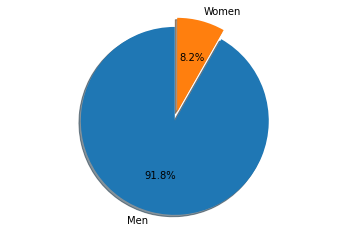

In [195]:
import matplotlib.pyplot as plt

labels = 'Men', 'Women'
sizes = [len(staff[staff['Gender']=='Hombre']), len(staff[staff['Gender']=='Mujer'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [196]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'N employees', 'Training hours'],
      dtype='object')

In [197]:
n_employees = staff.groupby(by=['Fabrica', 'Gender','Tipo trabajador']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Fabrica,Gender,Tipo trabajador,N employees,Training hours
0,Argentina,Hombre,Cedidos de otras plantas,86,52202.0
1,Argentina,Hombre,Duración Determinada,119,72233.0
2,Argentina,Hombre,ETT,146,88622.0
3,Argentina,Hombre,Incidente (no aplica),607,368449.0
4,Argentina,Hombre,Indefinido,314,190598.0


In [198]:
types = staff['Tipo trabajador'].unique()
types

array(['Incidente (no aplica)', 'ETT', 'Indefinido', 'Subcontratado',
       'Duración Determinada', 'Prácticas', 'Cedidos de otras plantas',
       'No aplica', 'Indefinido con preaviso'], dtype=object)

The Fabrics with most employees are Asturias and Burgos.

Asturias is as well the location with more women.

In [199]:
alt.Chart(n_employees, title="Nº employees by Fabric and Gender").mark_bar().encode( 
    y = 'N employees',
    x ='Fabrica',
     color='Gender').properties(
    width=1000,
    height=300
)


alt.Chart(...)

In [200]:
staff.columns

Index(['Codigo accidentado', 'Turno', 'Gender', 'Planta', 'Tipo accidente',
       'Tipo trabajador', 'Fabrica', 'Tecnología', 'Pais',
       'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'N employees', 'Training hours'],
      dtype='object')

In [201]:
n_employees = staff.groupby(by=['Age', 'Gender']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,Age,Gender,N employees,Training hours
0,Entre 30-50,Hombre,8750,7604675.0
1,Entre 30-50,Mujer,794,634599.0
2,Mayor 50,Hombre,6705,5977392.0
3,Mayor 50,Mujer,586,451456.0
4,Menor 30,Hombre,4010,3540403.0


The majority of the employees are Men between 30-50 years.

Between women the most common age group is between 30-50 as well.

In [202]:
alt.Chart(n_employees, title="Nº employees by Age and Gender").mark_bar().encode( 
    y = 'N employees',
    x ='Age',
     color='Gender').properties(
    width=700,
    height=300
)

alt.Chart(...)

In [203]:
n_employees = staff.groupby(by=['wk_position']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)
n_employees.head()

,wk_position,N employees,Training hours
0,AUXILIAR DE LINEA,438,397593.0
1,Anlagenführer Laser 5,410,335613.0
2,Auxiliar de producción,397,335025.0
3,Auxiliares de Logistica\r\nOperador de Grua Te...,438,378078.0
4,Camionero,432,360219.0


In [204]:
n_employees = n_employees.sort_values(by='N employees', ascending=False)

In [205]:
n_employees.head(10)

,wk_position,N employees,Training hours
20,Gruista de caldera y limpieza de caldera,489,398344.0
29,MAQUINISTA Y AYUDANTE TRANSVERSAL 4,474,435509.0
40,Operator / Stacker Operator,466,426280.0
45,Titular y ayudantes de Perfiladora de Dimeco P...,464,402693.0
16,GRUISTA DE CALDERA Y OPERARIOS DE LIMPIEZA,461,423483.0
22,Gruista y limpieza de caldera,451,385403.0
31,Maquinista,447,399939.0
30,Maestro,447,388254.0
32,Maquinista perfiladora,445,377161.0
26,Lkw-Fahrer,445,372135.0


In [206]:
len(n_employees['wk_position'].unique()) ## total of unique work positions

49

On the chart below we can see the work position are pretty uniform in relation to the nº of employees.

In [207]:
alt.Chart(n_employees, title="Nº employees by Work position").mark_bar().encode( 
    y = 'N employees',
    x ='wk_position',
     ).properties(
    width=1000,
    height=300
)
     

alt.Chart(...)

In [212]:
## we are going to see in detail the first 10 positions by gender

n_employees = staff.groupby(by=['wk_position', 'Gender']).agg('sum')

n_employees = n_employees.reset_index()
n_employees.drop(columns={'Planta', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs'}, inplace=True)

n_employees = n_employees.head(10)

n_employees

,wk_position,Gender,N employees,Training hours
0,AUXILIAR DE LINEA,Hombre,408,371036.0
1,AUXILIAR DE LINEA,Mujer,30,26557.0
2,Anlagenführer Laser 5,Hombre,378,311498.0
3,Anlagenführer Laser 5,Mujer,32,24115.0
4,Auxiliar de producción,Hombre,365,305677.0
5,Auxiliar de producción,Mujer,32,29348.0
6,Auxiliares de Logistica\r\nOperador de Grua Te...,Hombre,407,354787.0
7,Auxiliares de Logistica\r\nOperador de Grua Te...,Mujer,31,23291.0
8,Camionero,Hombre,401,334100.0
9,Camionero,Mujer,31,26119.0


In [213]:
alt.Chart(n_employees, title="Nº employees by Work position").mark_bar().encode( 
    y = 'N employees',
    x ='wk_position',
    color = 'Gender').properties(
    width=1300,
    height=300
)
     

alt.Chart(...)

Some information about our numerical data on trainning hours and working hours

In [128]:
staff[['Horas Presencia Efectiva Subcontratados',	'Horas Presencia Efectiva ETTs',	'Horas Formacion Seguridad Propios',	'Horas Formacion Seguridad ETTs',	'N employees']].describe()

,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,N employees
count,15849.000000,15849.000000,15849.000000,15849.000000,21210.0
mean,13155.729888,16585.554988,912.267209,255.643132,1.0
std,11694.713695,18859.905532,539.572227,361.751022,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,607.000000,0.000000,1.0
50%,17051.000000,2625.000000,1151.000000,0.000000,1.0
75%,25249.000000,42485.000000,1419.000000,829.000000,1.0
max,25685.000000,46113.000000,1544.000000,829.000000,1.0
